In [ ]:
import kagglehub
data_path = kagglehub.dataset_download('bmadushanirodrigo/fracture-multi-region-x-ray-data')

In [ ]:
import os
base_dir = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'
sub_dir = os.listdir(base_dir)
Categories = os.listdir(os.path.join(base_dir,"test"))

In [ ]:
Train_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train'
Test_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test'
Val_path = '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val'

In [ ]:
import cv2
import random
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [ ]:
img_size = 100

def fetch_data(path):
    data = []
    category = os.listdir(path)
    for cat in category:
        label = Categories.index(cat)
        img_dir = os.path.join(path,cat)
        images = os.listdir(img_dir)
        for img in images:
            try:
                img_array = cv2.imread(os.path.join(img_dir,img), cv2.IMREAD_GRAYSCALE)
                resized_img_array = cv2.resize(img_array, (img_size, img_size))
                data.append([resized_img_array,label])
            except Exception as e:
                pass
    return data

In [ ]:
Training_data = fetch_data(Train_path)
Testing_data = fetch_data(Test_path)
Val_data = fetch_data(Val_path)
print("Training Data: ", len(Training_data), "Testing Data: ", len(Testing_data), "Validation Data: ", len(Val_data))

Training Data:  9243 Testing Data:  506 Validation Data:  829


In [ ]:
random.shuffle(Training_data)

def makeX_y(data):
    makeX = []
    makeY = []

    for X, y in data:
        makeX.append(X)
        makeY.append(y)

    makeX = np.array(makeX).reshape(-1, img_size,img_size, 1)
    makeX = makeX / 255.0
    makeY = np.array(makeY)

    return makeX, makeY


X_train, y_train = makeX_y(Training_data)
X_test, y_test = makeX_y(Testing_data)
X_val, y_val = makeX_y(Val_data)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(9243, 100, 100, 1) (9243,)
(506, 100, 100, 1) (506,)
(829, 100, 100, 1) (829,)


In [ ]:
Model = Sequential()

Model.add(Conv2D(64, (3,3), padding = 'same',input_shape=X_train.shape[1:] ))
Model.add(Activation('relu'))
Model.add(MaxPooling2D(pool_size = (2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())

Model.add(Dense(1))
Model.add(Activation('sigmoid'))

Model.summary()

Model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

History = Model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       160,001 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,641 (627.50 KB)

 Trainable params: 160,641 (627.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7032 - loss: 0.5501 - val_accuracy: 0.9248 - val_loss: 0.2788
Epoch 2/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9183 - loss: 0.2647 - val_accuracy: 0.9497 - val_loss: 0.1727
Epoch 3/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9539 - loss: 0.1733 - val_accuracy: 0.9589 - val_loss: 0.1587
Epoch 4/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9707 - loss: 0.1106 - val_accuracy: 0.9703 - val_loss: 0.1048
Epoch 5/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9837 - loss: 0.0741 - val_accuracy: 0.9789 - val_loss: 0.0833
Epoch 6/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9916 - loss: 0.0496 - val_accuracy: 0.9800 - val_loss: 0.0742
Epoch 7/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9933 - loss: 0.0379 - val_accuracy: 0.9816 - val_loss: 0.0676
Epoch 8/40
232/232 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9944 - loss: 0.0335 - val_accuracy: 

In [ ]:
Model.save("bone_fracture_model.h5")

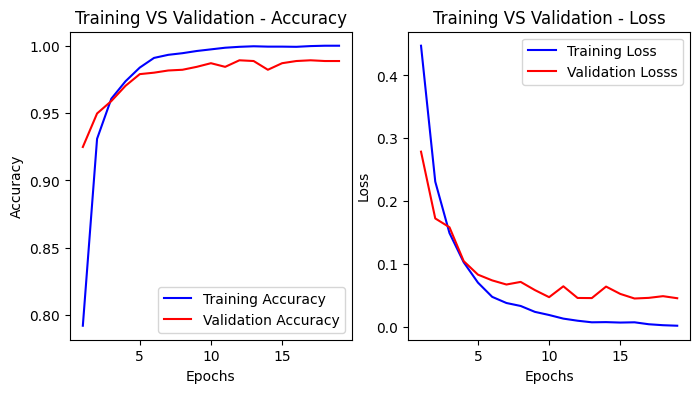

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title("Training VS Validation - Accuracy")
plt.legend()


plt.subplot(1,2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Losss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title("Training VS Validation - Loss")
plt.legend()
plt.show()

In [ ]:
Validation_loss, Validation_accuracy = Model.evaluate(X_val, y_val)
print("Validation Loss - ", Validation_loss, "Validation Accuracy - ", Validation_accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9780 - loss: 0.0858
Validation Loss -  0.2110990732908249 Validation Accuracy -  0.958986759185791


In [ ]:
y_pred = Model.predict(X_test)


threshold = 0.5
y_pred_label = []
fractured_count = 0
not_fractured_count = 0

for pred in y_pred:
    if(pred < 0.5):
        y_pred_label.append(0)
        not_fractured_count += 0
    else:
        y_pred_label.append(1)
        fractured_count += 1

true_count = 0
for true, pred in zip(y_test, y_pred_label):
    if true == pred:
        true_count += 1
print(f"Out of {len(y_test)} Samples, {true_count} Samples have the correct prediction from the model")
print("Accuracy: ", (true_count/len(y_test))*100)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Out of 506 Samples, 496 Samples have the correct prediction from the model
Accuracy:  98.02371541501977


In [ ]:
Model = load_model("bone_fracture_model.h5")

In [ ]:
loss, accuracy = Model.evaluate(X_test, y_test)
print(f"Test Accuracy: {Validation_accuracy:}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9789 - loss: 0.0438 
Test Accuracy: 0.958986759185791
